<strong> Football Data import using free API from football_data.org </strong>
<br>
<br>
[(https://rapidapi.com/Creativesdev/api/free-api-live-football-data/playground/apiendpoint_4c79d258-7ac0-4e0d-90e1-aa7f76cf1dd9)]
<br>
<br>
max calls 100 per day, import all data

<strong><span style="color:Red"> imports

In [21]:
import requests
import http.client
import json
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import urllib
from pyplot import matplotlib

ModuleNotFoundError: No module named 'pyplot'

<strong><span style="color:green"> keys and connections

write API results to SQL DB

In [2]:
#database connection detials
server = r"LAPTOP-ODMD499J\ZWDEV001"
database = "football_analysis"

connection_string = (
    f"mssql+pyodbc:///?odbc_connect="
    + urllib.parse.quote_plus(
        f"Driver={{ODBC Driver 17 for SQL Server}};"
        f"Server={server};"
        f"Database={database};"
        f"Trusted_Connection=yes;"
    )
)

# Create SQLAlchemy engine
engine = create_engine(connection_string)

conn=create_engine


In [3]:
#free rapid API
api_key = 'a8719fb165msh8145cfdce01b247p1b425ejsna232a4ee67a4'

In [4]:
# conn = http.client.HTTPSConnection("free-api-live-football-data.p.rapidapi.com")

# headers = {
#     'x-rapidapi-key': "a8719fb165msh8145cfdce01b247p1b425ejsna232a4ee67a4",
#     'x-rapidapi-host': "free-api-live-football-data.p.rapidapi.com"
# }

# conn.request("GET", "/football-popular-leagues", headers=headers)

# res = conn.getresponse()
# data = res.read()

# # Decode the byte data to a string and load it as JSON
# data_str = data.decode("utf-8")
# response_json = json.loads(data_str)

# # Extract the relevant part of the data for the DataFrame
# popular_leagues = response_json.get("response", [])

# # Convert the JSON data to a DataFrame
# df_popular_leagues = pd.json_normalize(popular_leagues)
# df_popular_leagues = pd.json_normalize(popular_leagues, 'popular')
# # Display the DataFrame
# print(df_popular_leagues)

# df_popular_leagues.to_sql('leagues',con=engine,index=False,if_exists='replace')


In [5]:
# conn = http.client.HTTPSConnection("free-api-live-football-data.p.rapidapi.com")

# headers = {
#     'x-rapidapi-key': "a8719fb165msh8145cfdce01b247p1b425ejsna232a4ee67a4",
#     'x-rapidapi-host': "free-api-live-football-data.p.rapidapi.com"
# }

# conn.request("GET", "/football-get-list-all-team?leagueid=47", headers=headers)

# res = conn.getresponse()
# data = res.read()

# # Decode the byte data to a string and load it as JSON
# data_str = data.decode("utf-8")
# response_json = json.loads(data_str)

# # Extract the relevant part of the data for the DataFrame
# teams_list = response_json.get("response", {}).get("list", [])

# # Normalize and flatten the list of dictionaries
# df_teams = pd.json_normalize(teams_list)

# # Display the flattened DataFrame
# print(df_teams)

# df_teams.to_sql('teams',con=engine,index=False,if_exists='replace')



In [6]:
# conn = http.client.HTTPSConnection("free-api-live-football-data.p.rapidapi.com")

# headers = {
#     'x-rapidapi-key': "a8719fb165msh8145cfdce01b247p1b425ejsna232a4ee67a4",
#     'x-rapidapi-host': "free-api-live-football-data.p.rapidapi.com"
# }

# conn.request("GET", "/football-get-all-matches-by-league?leagueid=47", headers=headers)

# res = conn.getresponse()
# data = res.read()
# print(data.decode("utf-8"))
# # Decode the byte data to a string and load it as JSON
# data_str = data.decode("utf-8")
# response_json = json.loads(data_str)

# # Extract the relevant part of the data for the DataFrame
# # fixture = response_json.get("response", {}).get("matches", [])

# # Normalize and flatten the list of dictionaries
# df_fixtures = pd.json_normalize(fixture)

# # Display the flattened DataFrame
# print(df_fixtures)

# df_fixtures.to_sql('fixtures',con=engine,index=False,if_exists='replace')



In [7]:
# conn = http.client.HTTPSConnection("free-api-live-football-data.p.rapidapi.com")

# headers = {
#     'x-rapidapi-key': "a8719fb165msh8145cfdce01b247p1b425ejsna232a4ee67a4",
#     'x-rapidapi-host': "free-api-live-football-data.p.rapidapi.com"
# }

# #for id in df_fixtures:
# conn.request("GET", f"/football-get-match-all-stats?eventid=4506263", headers=headers)
# res = conn.getresponse()
# data = res.read()
# print(data.decode("utf-8"))
# # Decode the byte data to a string and load it as JSON
# data_str = data.decode("utf-8")
# response_json = json.loads(data_str)
# # Extract the relevant part of the data for the DataFrame
# event_detail = response_json.get("response", {}).get("stats", [])
# # Normalize and flatten the list of dictionaries
# df_event_detail = pd.json_normalize(event_detail)
# # Display the flattened DataFrame

# # Sample JSON response (replace this with your actual data)
# data_str = data.decode("utf-8")
# response_json = json.loads(data_str)

# # Step 1: Extract the data into a structured list
# stats_list = []
# for stat_group in response_json.get("response", {}).get("stats", []):
#     for stat in stat_group.get("stats", []):
#         stats_list.append({
#             "stat_title": stat.get("title"),
#             "home_stat": stat.get("stats", [None, None])[0],  # First element for home stat
#             "away_stat": stat.get("stats", [None, None])[1]   # Second element for away stat
#         })
# # Create the DataFrame
# df_event_detail = pd.DataFrame(stats_list)

# # Step 1: Pivot the DataFrame to create separate columns for home and away stats
# df_event_detail_pivoted = df_event_detail.set_index('stat_title').T

# # Step 2: Rename columns to reflect 'home' or 'away' by concatenating stat_title with home/away
# df_event_detail_pivoted.columns = [
#     f"{stat_title}_{'home' if col == 'home_stat' else 'away'}"
#     for stat_title, col in zip(df_event_detail['stat_title'], ['home_stat', 'away_stat'])
# ]

# # Step 3: Transpose to get everything in one row (if required)
# df_event_statistics_detail = df_event_detail_pivoted.transpose().T

# # Display the resulting DataFrame
# print(df_event_statistics_detail)

# df_event_statistics_detail.to_sql('event_statistics_detail',con=engine,index=False,if_exists='replace')

In [8]:
# conn = http.client.HTTPSConnection("free-api-live-football-data.p.rapidapi.com")

# headers = {
#     'x-rapidapi-key': "a8719fb165msh8145cfdce01b247p1b425ejsna232a4ee67a4",
#     'x-rapidapi-host': "free-api-live-football-data.p.rapidapi.com"
# }

# conn.request("GET", "/football-get-match-all-stats?eventid=4621624", headers=headers)

# res = conn.getresponse()
# data = res.read()

# print(data.decode("utf-8"))

git hub game week (GW) combined data pull and combination of seasons

In [9]:
url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2023-24/gws/merged_gw.csv"

# Read the CSV file into a pandas DataFrame
df_2023_24_gw_data = pd.read_csv(url,on_bad_lines='warn')
#print(df_2023_24_gw_data)

url = "https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2024-25/gws/merged_gw.csv"

# Read the CSV file into a pandas DataFrame
df_2024_25_gw_data = pd.read_csv(url,on_bad_lines='warn')
#print(df_2024_25_gw_data)


df_2023_24_gw_data['game_year'] = '2023-24'
print(df_2023_24_gw_data.columns)

df_2024_25_gw_data['game_year'] = '2024-25'
print(df_2024_25_gw_data.columns)
#combine seasons for continutiy between years
df_gameweeks = pd.concat([df_2023_24_gw_data,df_2024_25_gw_data]).drop_duplicates().reset_index(drop=True)
print(df_gameweeks.columns)

Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW',
       'game_year'],
      dtype='object')
Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'mi

C:\Users\zicza\AppData\Local\Temp\ipykernel_8164\2485452332.py:10: ParserWarning: Skipping line 9299: expected 41 fields, saw 42
Skipping line 9300: expected 41 fields, saw 42
Skipping line 9301: expected 41 fields, saw 42
Skipping line 9302: expected 41 fields, saw 42
Skipping line 9303: expected 41 fields, saw 42
Skipping line 9304: expected 41 fields, saw 42
Skipping line 9305: expected 41 fields, saw 42
Skipping line 9306: expected 41 fields, saw 42
Skipping line 9307: expected 41 fields, saw 42
Skipping line 9308: expected 41 fields, saw 42
Skipping line 9309: expected 41 fields, saw 42
Skipping line 9310: expected 41 fields, saw 42
Skipping line 9311: expected 41 fields, saw 42
Skipping line 9312: expected 41 fields, saw 42
Skipping line 9313: expected 41 fields, saw 42
Skipping line 9314: expected 41 fields, saw 42
Skipping line 9315: expected 41 fields, saw 42
Skipping line 9316: expected 41 fields, saw 42
Skipping line 9317: expected 41 fields, saw 42
Skipping line 9318: expec

FPL scoing function and application

In [10]:
def scoring_mechanism (minutes, goals_scored, assists ,position, saves, penalties_saved, penalties_missed, clean_sheets ,goals_conceded, yellow_cards, red_cards, own_goals):

    score = 0

#time playing rule
    if minutes > 0 and minutes < 60: 
         score += 1
    if minutes >= 60:
        score += 2

#goals scored    
    if position == 'GK':
        score += goals_scored*10
    elif position == 'DEF':
        score += goals_scored*6
    elif position == 'MID':
        score += goals_scored*5
    elif position == 'FWD':
        score += goals_scored*4
    
#goal assists
    score += assists*3

#clean sheets
    if position in {'GK','DEF'} and clean_sheets == 1:
        score += 4
    elif position == 'MID' and clean_sheets == 1:
        score += 1

#goal saves
    if position == 'GK' and saves >=3:
        score += saves*(1/3)

#penalty saves
    score += penalties_saved*5

#penalty miss
    score += penalties_missed*-2

#goals conceeded
    if position in {'GK','DEF'} and goals_conceded >= 2:
        score += goals_conceded*(1/2)

#yellow cards
    score += yellow_cards*-1

#red cards    
    score += red_cards*-3

#own goals
    score += own_goals

#calc total score    
    return score


In [ ]:

def result_classification (team_a_score, team_h_score):

    if team_a_score > team_h_score:
        result = "Away win"
    elif team_h_score > team_a_score:
        result = "Home Win"
    elif team_a_score == team_h_score:
        result = "Draw"
    
    return result

In [12]:
# Define the required columns as a set (no need for a list of sets)
required_columns_scoring_mechanism = {
    "minutes", "goals_scored", "assists", "position", "saves",
    "penalties_saved", "penalties_missed", "clean_sheets", "goals_conceded",
    "yellow_cards", "red_cards", "own_goals"}


# Check for missing columns in the DataFrame
missing_columns = [col for col in required_columns_scoring_mechanism if col not in df_gameweeks.columns]

# Print missing columns or proceed
# Ensure all required columns are present
missing_columns = [col for col in required_columns_scoring_mechanism if col not in df_gameweeks.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Apply the function, passing the required columns explicitly
    df_gameweeks["fpl_score"] = df_gameweeks.apply(
        lambda row: scoring_mechanism(
            row["minutes"],
            row["goals_scored"],
            row["assists"],
            row["position"],
            row["saves"],
            row["penalties_saved"],
            row["penalties_missed"],
            row["clean_sheets"],
            row["goals_conceded"],
            row["yellow_cards"],
            row["red_cards"],
            row["own_goals"]
        ),
        axis=1
    )
    print(df_gameweeks.columns)

Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW', 'game_year',
       'fpl_score'],
      dtype='object')


define fixtures

In [24]:
columns_to_keep_events =["team","fixture","kickoff_time","team_a_score","team_h_score","was_home"]

df_events = df_gameweeks[columns_to_keep_events]

df_events = df_events.drop_duplicates()

df_events = df_events.sort_values(by=["kickoff_time","fixture","was_home"],ascending=(False,True,False))

df_events["home_vs_away"] = df_events.apply(
    lambda row: (
        row["team"] + "-" + (
            df_events["team"].shift(-1).fillna("Unknown")[row.name] 
            if row["was_home"] 
            else df_events["team"].shift(+1).fillna("Unknown")[row.name]
        )
    ) if (
        (row["was_home"] and row.name < len(df_events) + 1) or (not row["was_home"] and row.name > 0)
    ) else row["team"],  # Handle edge cases
    axis=1
)

#df_events = df_events[df_events["was_home"]== False]

df_events["away_team"] = df_events["home_vs_away"].str.split("-").str[0]
df_events["home_team"] = df_events["home_vs_away"].str.split("-").str[1]

#df_events = df_events.drop(columns= ["home_vs_away","team"])

df_events["result"] = df_events.apply(lambda row:result_classification(
    row ["team_a_score"]
    ,row ["team_h_score"]
    ),axis = 1
)



print(df_events)

                 team  fixture  ...      home_team    result
38329     Bournemouth      133  ...            NaN  Home Win
38336           Spurs      133  ...    Bournemouth  Home Win
38362          Fulham      135  ...            NaN  Home Win
38343        Brighton      135  ...         Fulham  Home Win
38331         Arsenal      131  ...            NaN  Home Win
...               ...      ...  ...            ...       ...
37     Crystal Palace        7  ...  Sheffield Utd  Away win
24            Arsenal        2  ...  Nott'm Forest  Home Win
18      Nott'm Forest        2  ...        Arsenal  Home Win
10            Burnley        1  ...       Man City  Away win
7            Man City        1  ...        Burnley  Away win

[1040 rows x 10 columns]


<strong>Random Forest initial Test

In [ ]:
df = df_events  # Replace with your data path
df['kickoff_time'] = pd.to_datetime(df['kickoff_time'])
df.sort_values('kickoff_time', inplace=True)

print(df.columns)

# Feature engineering
df['form_score_home'] = df.groupby('team')['team_h_score'].rolling(5).mean().reset_index(0, drop=True)
df['form_score_away'] = df.groupby('team')['team_a_score'].rolling(5).mean().reset_index(0, drop=True)
df['goal_diff_home'] = df['team_h_score'] - df['team_a_score']
df['goal_diff_away'] = df['team_a_score'] - df['team_h_score']

# Target variable: Win (1), Draw (0), Lose (-1)
df['result_num'] = np.where(df['team_h_score'] > df['team_a_score'], 1,
                        np.where(df['team_h_score'] == df['team_a_score'], 0, -1))

# Split features and target
features = ['form_score_home', 'form_score_away', 'goal_diff_home', 'goal_diff_away']  # Add more features
X = df[features]
y = df['result_num']

df_train = df[df["kickoff_time"]<'2024,7,1']
df_test = df[df["kickoff_time"]>'2024,7,1']
# Train/test split using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train Random Forest
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds)}")
    print(f"Random Forest F1 Score: {f1_score(y_test, rf_preds, average='weighted')}")

    # # Train XGBoost
    # xgb_model.fit(X_train, y_train)
    # xgb_preds = xgb_model.predict(X_test)
    # print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_preds)}")
    # print(f"XGBoost F1 Score: {f1_score(y_test, xgb_preds, average='weighted')}")


Index(['team', 'fixture', 'kickoff_time', 'team_a_score', 'team_h_score',
       'was_home', 'home_vs_away', 'away_team', 'home_team', 'result',
       'form_score_home', 'form_score_away', 'goal_diff_home',
       'goal_diff_away', 'result_num'],
      dtype='object')
Random Forest Accuracy: 1.0
Random Forest F1 Score: 1.0
Random Forest Accuracy: 1.0
Random Forest F1 Score: 1.0
Random Forest Accuracy: 1.0
Random Forest F1 Score: 1.0
Random Forest Accuracy: 1.0
Random Forest F1 Score: 1.0
Random Forest Accuracy: 1.0
Random Forest F1 Score: 1.0


[]

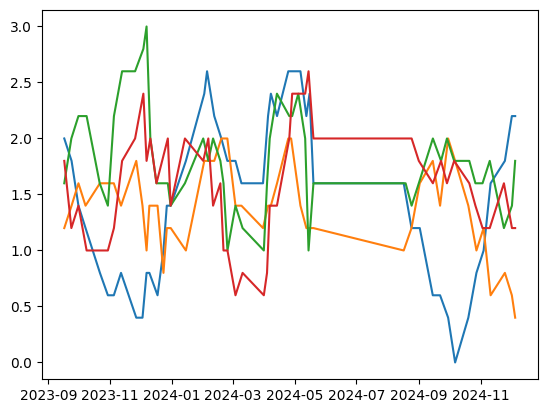

In [37]:
import matplotlib.pyplot as plt

df_manu = df[df["team"] == 'Man Utd']
df_manc = df[df["team"] == 'Man City']

plt.plot(df_manu["kickoff_time"],df_manu["form_score_home"])
plt.plot(df_manu["kickoff_time"],df_manu["form_score_away"])
plt.plot(df_manc["kickoff_time"],df_manc["form_score_home"])
plt.plot(df_manc["kickoff_time"],df_manc["form_score_away"])
plt.plot()

# plt.scatter()

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot
